### Name: Awez Sheikh
### Roll No.: 32
### Batch: A2
### Practical 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv(r"Mall_Customers.xls - Mall_Customers.xls.csv" )

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
eGender = LabelEncoder()

In [17]:
df['Gender'] = eGender.fit_transform(df['Gender'])

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [19]:
df.drop('CustomerID', axis='columns', inplace=True)

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [21]:
X = df.drop(['Age', 'Gender'], axis='columns')

In [22]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

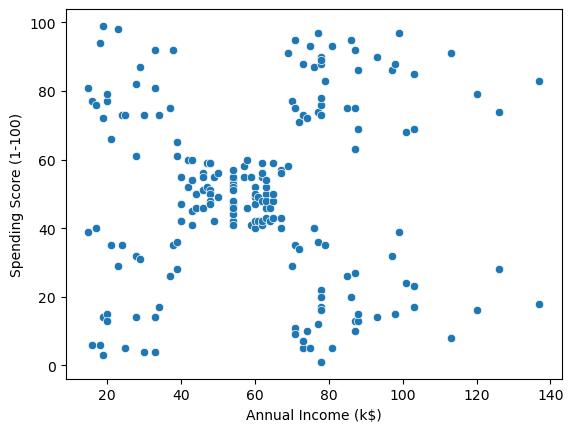

In [23]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

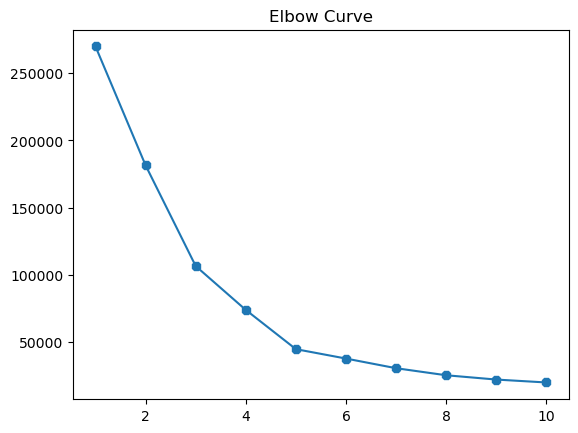

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="8")
plt.title("Elbow Curve")
plt.show()

In [25]:
wcss

[269981.27999999997,
 181363.595959596,
 106348.37306211119,
 73679.78903948834,
 44448.4554479337,
 37455.984555160285,
 30259.657207285476,
 25011.839349156595,
 21809.927562615183,
 19636.753964898155]

In [26]:
kmeans = KMeans(n_clusters=5, n_init=10)
label=kmeans.fit_predict(X)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 3 0 1 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [27]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


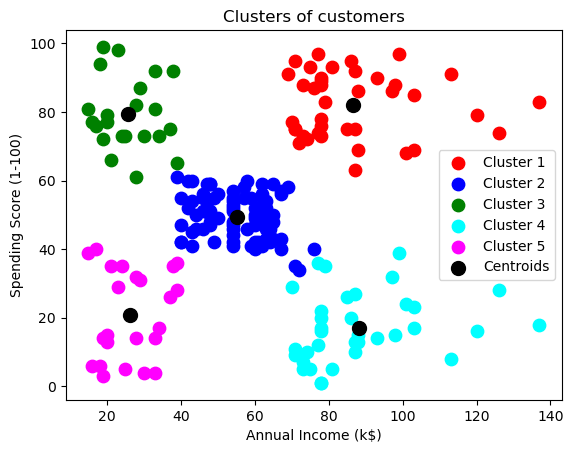

In [28]:
plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
                   'Spending Score (1-100)'],
            s=80, c='red', label='Cluster 1')

plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1, 'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2, 'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3, 'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4, 'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
            c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [30]:
x= df.drop(['Gender'], axis='columns')

In [31]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

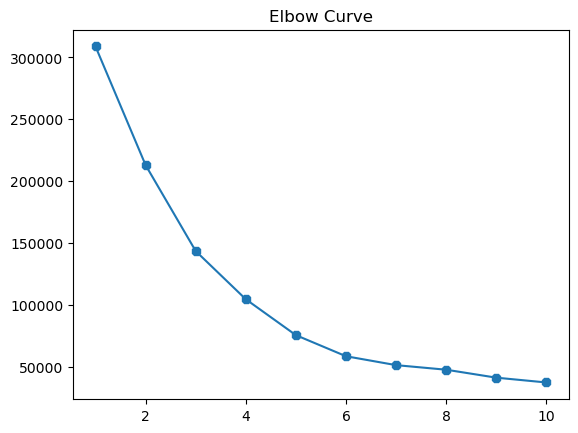

In [33]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="8")
plt.title("Elbow Curve")
plt.show()

In [34]:
wcss

[308812.77999999997,
 212840.16982097182,
 143342.751571706,
 104374.15985112861,
 75350.77917248776,
 58300.44332159069,
 51098.58740856844,
 47396.68523143522,
 40972.381544771015,
 37083.687752579484]

In [35]:
kmeans = KMeans(n_clusters=5, n_init=10)
label=kmeans.fit_predict(x)
print(label)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 3 4 1 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 1 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [36]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [32.69230769 86.53846154 82.12820513]]


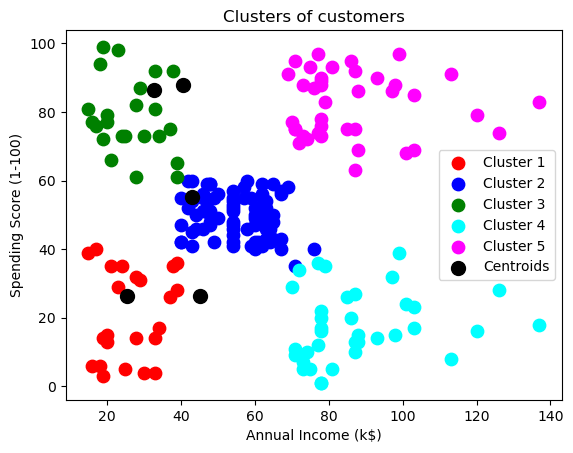

In [37]:
plt.scatter(X.loc[label == 0, 'Annual Income (k$)'], X.loc[label == 0,
                   'Spending Score (1-100)'],
            s=80, c='red', label='Cluster 1')

plt.scatter(X.loc[label == 1, 'Annual Income (k$)'], X.loc[label == 1, 'Spending Score (1-100)'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'Annual Income (k$)'], X.loc[label == 2, 'Spending Score (1-100)'], s=80, c='green', label='Cluster 3')
plt.scatter(X.loc[label == 3, 'Annual Income (k$)'], X.loc[label == 3, 'Spending Score (1-100)'], s=80, c='cyan', label='Cluster 4')
plt.scatter(X.loc[label == 4, 'Annual Income (k$)'], X.loc[label == 4, 'Spending Score (1-100)'], s=80, c='magenta', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100,
            c='black', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()